In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import unicodedata

# Load data 
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

## 1. EXPLORATORY DATA ANALYSIS ##

### 1.1 Initial Data Inspection ###

In [2]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [3]:
df.shape

(2235, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [5]:
df.nunique()

HastaNo            404
Yas                 75
Cinsiyet             2
KanGrubu             8
Uyruk                5
KronikHastalik     220
Bolum               10
Alerji              38
Tanilar            367
TedaviAdi          244
TedaviSuresi        23
UygulamaYerleri     37
UygulamaSuresi      10
dtype: int64

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{df[col].value_counts().head(10)}")
    print(f"Unique values: {df[col].nunique()}")

Categorical columns: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']

Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64
Unique values: 2

KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64
Unique values: 8

Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64
Unique values: 5

KronikHastalik
Myastenia gravis                        38
Aritmi                                  36
Fascioscapulohumeral Distrofi           36
Hipertiroidizm                          34
Limb-Girdle Musküler Distrofi, Astım    34
Kalp yetmezliği                         33
Hipertansiyon                           31
Astım                                   30
Becker Musküler Distrofisi              29
Limb-Girdle Musküler Distrofi        

In [7]:
data_unique_patients = df.drop_duplicates(subset="HastaNo")

data_unique_patients.describe().T

,count,mean,std,min,25%,50%,75%,max
HastaNo,404.0,145335.500000,116.769003,145134.0,145234.75,145335.5,145436.25,145537.0
Yas,404.0,47.200495,15.485586,2.0,38.00,46.0,56.00,92.0


### 1.2 Missing Values ### 

Missing value summary:
                 MissingCount  Percentage
Alerji                    944       42.24
KanGrubu                  675       30.20
KronikHastalik            611       27.34
UygulamaYerleri           221        9.89
Cinsiyet                  169        7.56
Tanilar                    75        3.36
Bolum                      11        0.49
HastaNo                     0        0.00
Yas                         0        0.00
Uyruk                       0        0.00
TedaviAdi                   0        0.00
TedaviSuresi                0        0.00
UygulamaSuresi              0        0.00


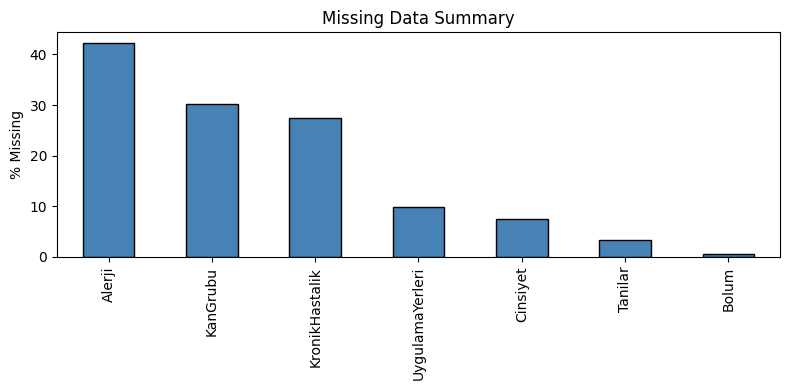

In [8]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_count / len(df)) * 100
missing_summary = (
    pd.DataFrame({
        'MissingCount': missing_count,
        'Percentage': missing_percentage
    })
)
missing_summary['Percentage'] = missing_summary['Percentage'].round(2)

print("Missing value summary:")
print(missing_summary)

missing_summary.sort_values('Percentage', ascending=False)['Percentage'][missing_summary['Percentage'] > 0].plot(
    kind='bar', figsize=(8,4), color='steelblue', edgecolor='black'
)

plt.ylabel('% Missing')
plt.title('Missing Data Summary')
plt.tight_layout()

### 1.3 Variable Analysis ###

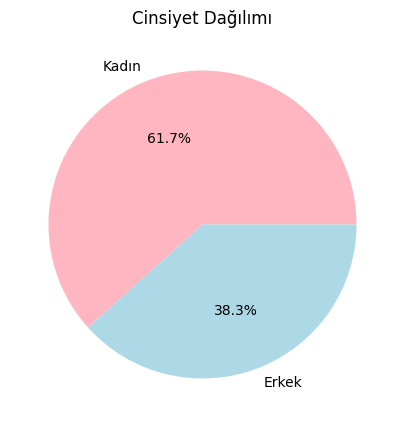

In [9]:
plt.figure(figsize=(8, 5))
df['Cinsiyet'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Cinsiyet Dağılımı')
plt.ylabel('')
plt.show()

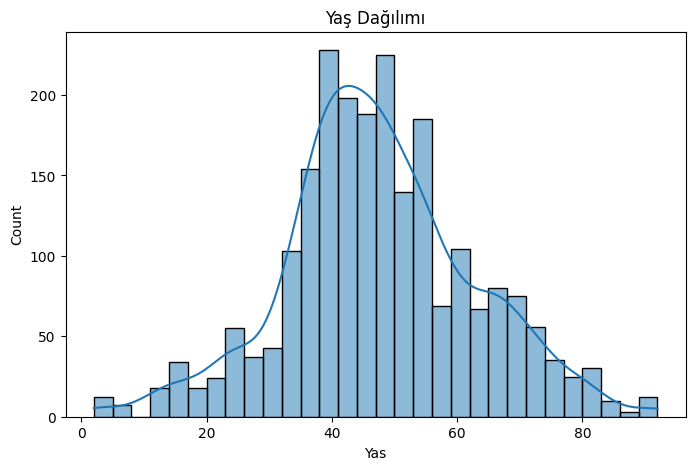

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Yas'].dropna(), bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.show()

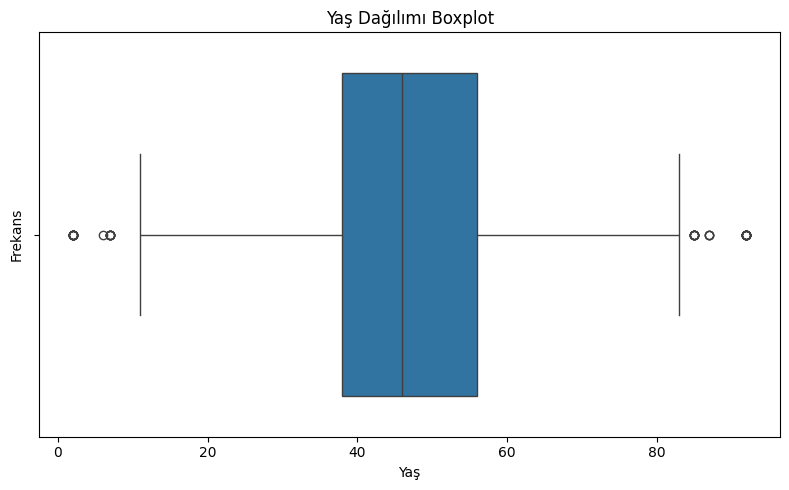

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Yas'], data=df)
plt.title('Yaş Dağılımı Boxplot')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

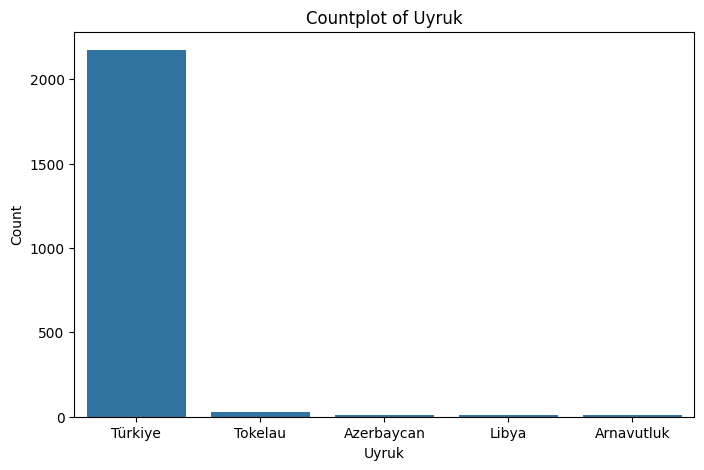

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Uyruk', data=df)
plt.title('Countplot of Uyruk')
plt.xlabel('Uyruk')
plt.ylabel('Count')
plt.show()

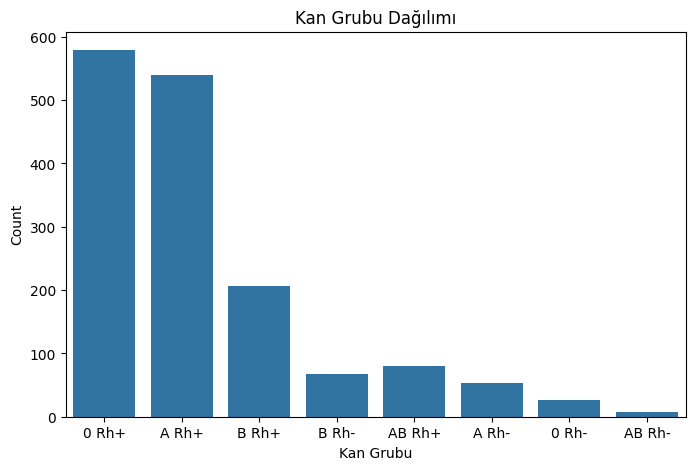

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='KanGrubu', data=df)
plt.title('Kan Grubu Dağılımı')
plt.xlabel('Kan Grubu')
plt.ylabel('Count')
plt.show()

In [14]:
def normalize_text(x):

    def strip_accents(text):
        text = unicodedata.normalize('NFD', text)
        text = ''.join(c for c in text if unicodedata.category(c) != 'Mn')
        return text

    if pd.isna(x):
        return None

    items = [
        re.sub(r'\s+', ' ', strip_accents(item.strip().lower())).strip()
        for item in x.split(",")
    ]
    
    items = [i for i in items if i != ""]
    return items if items else None    

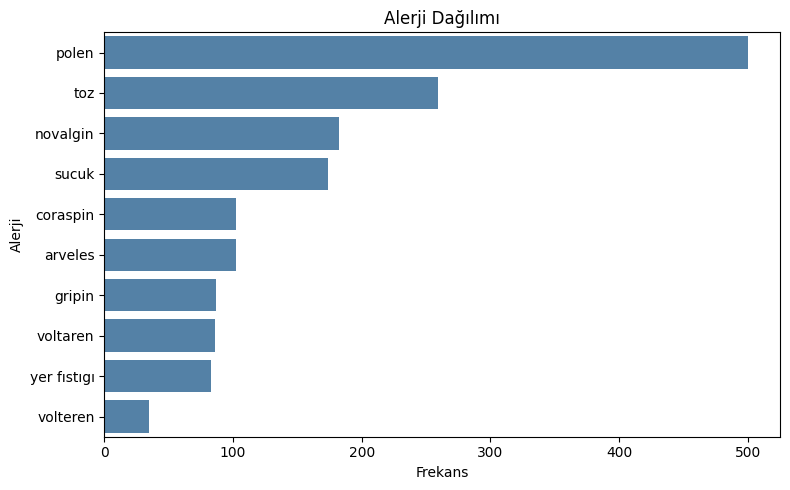

In [15]:

allergies = df['Alerji'].apply(normalize_text).explode().value_counts()
allergies_df = allergies.reset_index()
allergies_df.columns = ['Alerji', 'Frekans']

plt.figure(figsize=(8, 5))
sns.barplot(data=allergies_df, x='Frekans', y='Alerji', color='steelblue')
plt.title('Alerji Dağılımı')
plt.xlabel('Frekans')
plt.ylabel('Alerji')
plt.tight_layout()
plt.show()

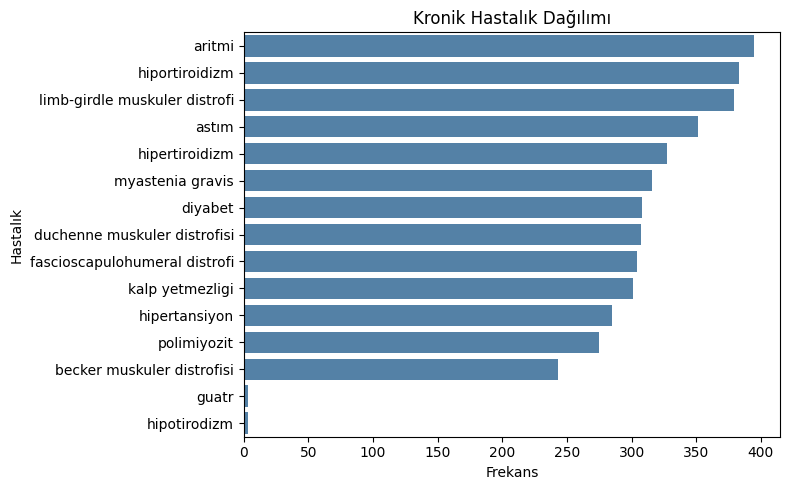

In [16]:
chronic_conditions = df['KronikHastalik'].apply(normalize_text).explode().value_counts()

chronic_conditions_df = chronic_conditions.reset_index()
chronic_conditions_df.columns = ['Tanı', 'Frekans']

plt.figure(figsize=(8, 5))
sns.barplot(data=chronic_conditions_df, x='Frekans', y='Tanı', color='steelblue')
plt.title('Kronik Hastalık Dağılımı')
plt.xlabel('Frekans')
plt.ylabel('Hastalık')
plt.tight_layout()
plt.show()

In [17]:
diagnosis = df['Tanilar'].apply(normalize_text).explode().value_counts()
print("Total Diagnoses:", diagnosis.shape[0])
diagnosis.head(25)

Total Diagnoses: 279


Tanilar
dorsalji                             800
diger                                769
tanımlanmamıs                        408
omuzun darbe sendromu                273
intervertebral disk bozuklukları     270
lumbosakral bolge                    266
servikotorasik bolge                 211
servikal bolge                       148
eklem agrısı                         113
birden fazla yer                      75
fibromiyalji                          70
simdiki                               62
meniskus yırtıgı                      62
ekstremite agrısı                     61
gonartroz [diz ekleminin artrozu]     54
lateral epikondilit                   53
radikulopati                          52
boyun agrısı                          50
bacak                                 47
pelvik bolge ve kalca                 45
kondromalazia patella                 45
spinal stenoz                         40
eklemde agrı                          37
servikal disk bozuklukları            30
torasik 

In [18]:
treatment = df['TedaviAdi'].apply(normalize_text).explode().value_counts()
print("Total Treatments:", treatment.shape[0])
treatment.head(25)

Total Treatments: 233


TedaviAdi
dorsalji -boyun+trapez             231
iv disk bozuklugu-bel              200
dorsalji 1                         140
dorsalji-bel                       120
sol omuz impingement               105
gonartroz-meniskopati               95
sag omuz impingement                80
boyun-trapezz                       60
dorsalji-dorsal                     56
alt ekstremite atrofi-bilateral     37
dorsalji boyun 1                    35
impingement sag                     32
sol diz implantı reh                20
meniskus tamiri                     20
iv disk bozuklugu-bel-2             18
skolyoz                             16
el rehabilitasyonu                  16
patella kırıgı                      15
bel ftr                             15
asil kısalıgı                       11
kalca agrısı                        10
gonartroz                           10
bel                                 10
diz op-erken rehabilitasyon         10
sol kalca implanti                  10
Name: count, dt

In [19]:
df['TedaviSuresi'].value_counts()

TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     113
2 Seans       45
17 Seans      36
4 Seans       35
16 Seans      27
18 Seans      20
21 Seans      20
5 Seans       17
30 Seans      12
19 Seans      10
11 Seans       9
3 Seans        7
8 Seans        6
37 Seans       5
22 Seans       5
29 Seans       5
7 Seans        5
25 Seans       5
6 Seans        3
1 Seans        3
14 Seans       2
Name: count, dtype: int64

In [20]:
body_locations = df['UygulamaYerleri']

body_locations = body_locations.str.replace(r'\b(Sağ|Sol|Bölgesi)\b', '', regex=True).str.strip()
body_locations = body_locations.apply(normalize_text).explode().value_counts()
body_locations

UygulamaYerleri
bel            543
boyun          388
omuz           283
diz            261
el bilek       148
ayak bilegi    141
kalca          122
sırt            96
tum vucut       62
dirsek          31
yuz             13
Name: count, dtype: int64

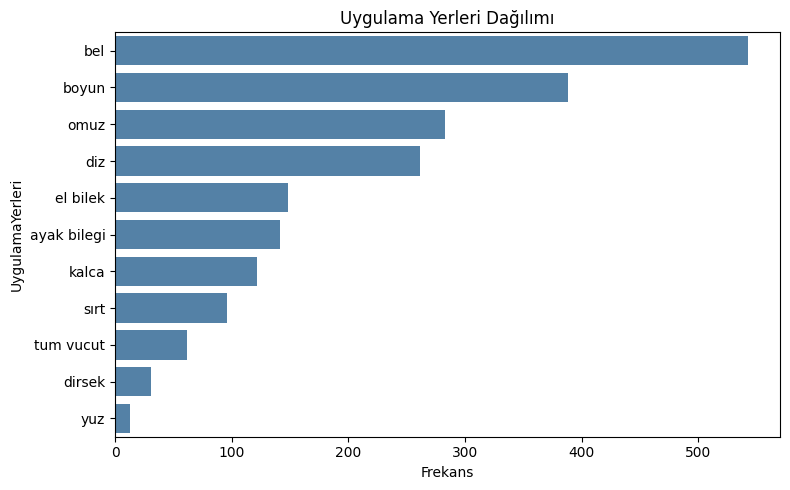

In [22]:
# body locations countplot 
plt.figure(figsize=(8, 5))
sns.barplot(x=body_locations.values, y=body_locations.index, color='steelblue')
plt.title('Uygulama Yerleri Dağılımı')
plt.xlabel('Frekans')
plt.tight_layout()
plt.show()

In [21]:
uygulama_suresi = df['UygulamaSuresi'].value_counts()
uygulama_suresi

UygulamaSuresi
20 Dakika    1535
5 Dakika      360
10 Dakika     221
15 Dakika      89
30 Dakika      11
45 Dakika      10
25 Dakika       5
40 Dakika       2
3 Dakika        1
8 Dakika        1
Name: count, dtype: int64

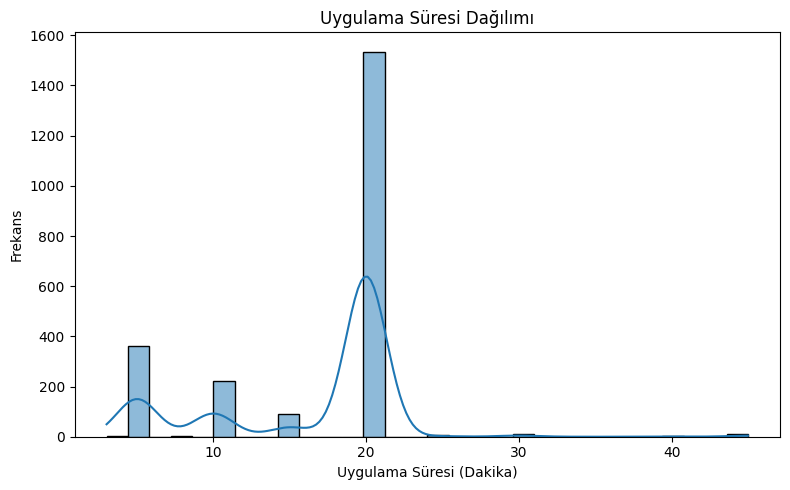

In [34]:
uygulama_suresi = df['UygulamaSuresi'].str.extract(r'(\d+)').astype(int)[0]

plt.figure(figsize=(8, 5))
sns.histplot(uygulama_suresi, bins=30, kde=True)
plt.title('Uygulama Süresi Dağılımı')
plt.xlabel('Uygulama Süresi (Dakika)')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()